In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

rating_cols = ['user_id', 'anime_id', 'rating']
ratings = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/rating.csv', names=rating_cols, usecols=range(3), encoding="ISO-8859-1")
ratings = ratings[1:]
ratings.head(5)

/Users/brangmai/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_id,anime_id,rating
1,1,8074,10
2,1,11617,10
3,1,11757,10
4,1,15451,10
5,2,11771,10


In [2]:
rating_stats = ratings.groupby('anime_id').agg({'rating': [np.size, np.mean]})
rating_stats.head(5)

rating          
           size      mean
anime_id                 
1          1423  8.889670
5           704  8.375000
6          1006  8.395626
7           285  7.533333
8            41  7.195122

In [3]:
anime_num_ratings = pd.DataFrame(rating_stats['rating']['size'])

min_ratings = int(np.min(anime_num_ratings))
max_ratings = int(np.max(anime_num_ratings))

normalized_ratings = []
for i in anime_num_ratings:
    normalized_ratings.append((anime_num_ratings[i] - min_ratings) / (max_ratings - min_ratings))
    
normalized_ratings = pd.DataFrame(normalized_ratings)
#normalized_ratings.head(10)
normalized_ratings.size

13664

In [4]:
anime_cols = ['anime_id', 'name', 'genre', 'type', 'episodes', 'rating']
anime = pd.read_csv('/Users/brangmai/Desktop/Capstone/modified_data/anime.csv', names=anime_cols, usecols=range(6), encoding="ISO-8859-1")
anime = anime[1:]
anime = pd.DataFrame(anime)
anime.head(5)

,anime_id,name,genre,type,episodes,rating
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82
2,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.4
3,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32
4,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36
5,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06


In [5]:
anime.size

73764

In [6]:
# Raw genre strings

anime_genres = []

for genre in anime['genre']:
    if isinstance(genre, str):
        #if genre not in anime_genres:
        anime_genres.append(genre)
        
#pprint(anime_genres)
# anime_genres = pd.DataFrame(anime_genres)
# len(anime_genres.index)

In [7]:
genre_types = [] # genre list 
genre_arrays = []
for genres in anime_genres:
    split_genre = genres.split(', ')
    array_for_genre_array = []
    for each_gen in split_genre:
        if isinstance(each_gen, str):
            array_for_genre_array.append(each_gen)
            if each_gen not in genre_types:
                genre_types.append(each_gen)
    genre_arrays.append(array_for_genre_array)
    
# genre_types.sort()
# print(genre_types)

In [8]:
# for genre in genre_arrays:
#     print(genre)

In [9]:
# DON'T RUN THIS CODE

# Save Genre
# output_file = open('genres.txt', 'w')

# for gen_type in genre_types:
#     output_file.write(gen_type)

# output_file.close()


In [10]:
# READ genres.txt line by line
anime_genres = []
with open('genres.txt') as f:
    
    for line in f:
        line = line.strip('\n')
        anime_genres.append(line) 
        
f.close()
# for gen in anime_genres:
#     print(gen)

In [11]:
# Anime genres are changed into boolean 

genres_in_binary = []
for genre_list in genre_arrays:
    
    temp = np.zeros(43)
    for gen_item in genre_list:
        for gen_type in range(len(anime_genres)):
            if gen_item == anime_genres[gen_type]:
                temp[gen_type] = 1
            
    genres_in_binary.append(temp)

In [12]:
genre_list = 1
for item in genres_in_binary:
    genre_list += 1
    #print(item)
print(f'Total list: {genre_list}')

Total list: 12232


In [13]:
# print(f'Total of anime in the data file: {len(anime.index)}')
# genres_in_binary = pd.DataFrame(genres_in_binary)
# print(f'Tall genre list: {len(genres_in_binary.index)}')

In [14]:
# Total anime list count: 12294
# Total genres_in_binary count: 12231

anime_dictionary = {}

index = 1   
for name in anime['name']:
    genres = genres_in_binary[index - 1]
    genres = map(int, genres)
    anime_dictionary[index] = (name, np.array(list(genres)))
    index += 1
    if index == len(genres_in_binary):
        break


#print(genres_in_binary[0])


In [15]:
anime_dictionary[1]

('Cowboy Bebop',
 array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

# Save anime_dictionary in JSON

In [16]:
# DON'T RUN THIS CODE

# import json

# anime_dictionary = {}

# index = 1   
# for name in anime['name']:
#     genres = genres_in_binary[index - 1]
#     genres = map(int, genres)
#     anime_dictionary[index] = (name, np.array(list(genres)).tolist())
#     index += 1
#     if index == len(genres_in_binary):
#         break

# anime_dict = json.dumps(anime_dictionary)
# with open('anime_dictionary.json', 'w') as f:
#     f.write(anime_dict)
#     f.close()

# Read anime_dictionary JSON file

In [17]:
import json
import pandas as pd

anime_dictionary = json.load(open('anime_dictionary.json'))
# for key in anime_dictionary:
#     print(anime_dictionary[key])


# for ani in anime_dictionary:
#     print(ani)
# anime_dictionary = pd.DataFrame(anime_dictionary)
# anime_dictionary.head()

In [18]:
anime_ratings = pd.merge(anime, ratings)
anime_ratings = anime_ratings.sort_values(by='anime_id', ascending=True)
anime_ratings.head(5) 

,anime_id,name,genre,type,episodes,rating,user_id
58,10488,Shocking Pink!,"Harem, Hentai",OVA,2,7,2115
61,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,1484
59,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,438
60,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,954
62,11763,Sekai de Ichiban Tsuyoku Naritai!,"Action, Ecchi, Sports",TV,12,6,1497


In [19]:
# anime_stats = anime_ratings.groupby('name').agg({'rating': [np.size, np.mean]})
# anime_stats.head(10)

In [20]:
# popular_animes = anime_stats['rating']['size'] >= 10
# ani_stats = anime_stats[popular_animes].sort_values([('rating', 'mean')], ascending=False)
# ani_stats.head(50)


In [21]:
# user_ratings = anime_ratings.pivot_table(index=['user_id'], columns=['name'], values='rating')
# user_ratings.head(10)

In [22]:
# Find out who watched and rated the anime "Comet Lucifer"

# comet_lucifer_ratings = user_ratings['Comet Lucifer']
# comet_lucifer_ratings = comet_lucifer_ratings.dropna()
# comet_lucifer_ratings.head(10)

In [23]:
# #user_ratings = pd.DataFrame(user_ratings)
# similar_anime = user_ratings.corrwith(comet_lucifer_ratings)
# #similar_anime = similar_anime.dropna()
# df = pd.DataFrame(similar_anime)
# df.head(10)

In [24]:
# similar_anime = similar_anime.sort_values(ascending=False)
# similar_anime.head(10)

In [25]:
# corr_matrix = user_ratings.corr(method='pearson', min_periods=100) # pearson: standart correlation coefficient
# corr_matrix.head(100)

In [26]:
# normalized_anime_ratings = anime_ratings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
# normalized_anime_ratings.head(10)

In [27]:
# import pandas as pd
# genres = pd.DataFrame(genres_in_binary, columns=['gen_bin'])
# genres.head()

In [28]:
import sys
anime_dictionary = {}
# for anime_item in anime['name']:
# anime_id = 1
# for name in anime['name']:
#     anime_dictionary[anime_id] = (
#         name, 
#         np.array(genres_in_binary[anime_id]), 
#         normalized_ratings.loc[anime_id].get('size'), 
#         rating_stats.loc[anime_id].rating.get('mean')
#     )
#     anime_id += 1
anime_titles = []
for ani in anime['name']:
    anime_titles.append(ani)

anime_titles = anime_titles[:12231]
normalized_rating_size = normalized_ratings[:12231]
print("anime title size: " + str(len(anime_titles)))
print("genres size: " + str(len(genres_in_binary)))
print("normalized ratings size: " + str(normalized_ratings.size))
    


anime title size: 12231
genres size: 12231
normalized ratings size: 13664


In [29]:
anime_ratings = anime_ratings.drop(columns=['genre'])
anime_ratings.head(10)

,anime_id,name,type,episodes,rating,user_id
58,10488,Shocking Pink!,OVA,2,7,2115
61,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1484
59,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,438
60,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,954
62,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1497
63,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,1522
64,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,2186
65,11763,Sekai de Ichiban Tsuyoku Naritai!,TV,12,6,3040
0,124,Fushigi Yuugi: Eikouden,OVA,4,7,439
1,124,Fushigi Yuugi: Eikouden,OVA,4,7,848


Group by anime names to get rating counts

In [30]:
combine_anime_ratings = anime_ratings.dropna(axis=0, subset = ['name'])

anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
35,Sword Art Online: Extra Edition,80
18,Little Witch Academia,72
13,Gekkan Shoujo Nozaki-kun Specials,28
28,Samurai Flamenco,25
16,Kamisama Hajimemashita OVA,20
8,Comet Lucifer,17
29,Schwarzesmarken,16
10,Detective Conan Movie 02: The Fourteenth Target,12
2,Aoi Sekai no Chuushin de,10
31,Sex Pistols,7


In [31]:
combine_anime_rating = anime.dropna(axis=0, subset = ['name'])
anime_rating_count = (combine_anime_ratings.groupby(by=['name'])['rating'].count().reset_index().rename(columns = {'rating': 'total_rating'})[['name', 'total_rating']])
anime_rating_count = anime_rating_count.sort_values('total_rating', ascending=False)
anime_rating_count.head(10)

,name,total_rating
35,Sword Art Online: Extra Edition,80
18,Little Witch Academia,72
13,Gekkan Shoujo Nozaki-kun Specials,28
28,Samurai Flamenco,25
16,Kamisama Hajimemashita OVA,20
8,Comet Lucifer,17
29,Schwarzesmarken,16
10,Detective Conan Movie 02: The Fourteenth Target,12
2,Aoi Sekai no Chuushin de,10
31,Sex Pistols,7


In [32]:
print(ratings.shape)
print(ratings.columns)
ratings.head()

(854113, 3)
Index(['user_id', 'anime_id', 'rating'], dtype='object')


,user_id,anime_id,rating
1,1,8074,10
2,1,11617,10
3,1,11757,10
4,1,15451,10
5,2,11771,10


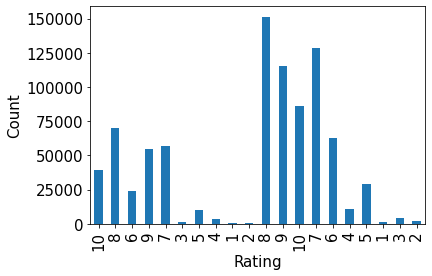

In [33]:


plt.rc("font", size=15)
ratings.rating.value_counts(sort=False).plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [34]:
print(anime.shape)
print(list(anime.columns))
anime.head()

(12294, 6)
['anime_id', 'name', 'genre', 'type', 'episodes', 'rating']


,anime_id,name,genre,type,episodes,rating
1,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82
2,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.4
3,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32
4,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36
5,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06


In [35]:
rating_count = pd.DataFrame(ratings.groupby('anime_id')['rating'].count())
rating_count.sort_values('rating', ascending=False).head()

,rating
anime_id,
1535,3243
1575,2384
226,2232
121,2199
2904,2110
